In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft 
from scipy.signal import medfilt as mediann
from librosa import stft, istft
from test.plotting import basic_plot, basic_plot_comparison 
from hps import hps
from test.signals import  harmonic, impulses 
from pytsmod.hptsm import _hpss
import test.test_subjective as TS




In [10]:

def hps_similarity_test(xp,xh,plot, N, M, fs):
    """Measure the similarity between pure aromonic and percuse signal imput and the hps output.

    Args:
        xp(np.array): Percusive signal.
        x_ideal (np.array): Harmonic signal. 
        plot (boolean): Option to display the result in a graph.
        audio_save (boolean): Option to save the audios in the audio directory.
        N (int): STFT lenght.
        N (int): Median filter lenght (must be od)
        fs (int): Sample rate.
    Returns:
        Percusive_Similarity (float): Normalize value from 0 to 1 with the effectiveness of the algorithm.  
        Harmonic_Similarity (float): Normalize value from 0 to 1 with the effectiveness of the algorithm.       
    """
    x = xp + xh
    yp, yh = hps(x,N,M)
    h_similarity = np.sum(np.abs(xp - yp))/len(yp)
    p_similarity = np.sum(np.abs(xh - yh))/len(yh)
    harmonic_max_sim = np.abs(np.max(xh) - np.max(yh))/np.max(xh)
    return h_similarity, p_similarity, harmonic_max_sim




    gain_discrepancy = np.abs(np.max(x_ideal) - np.max(x_result))

## HPS: Separacion Armonica y Percusiva.
Este algoritmo busca seraparar las componetes armonicas y percusivas de una señal de audio, con el objetivo de implementar un TSM hibrido que procesa cada una de estas componentes por serapado,  el OLA y PV  aprovechando las mejores cualidades de cada uno.

La entrada de este algoritmo es la señal de audio con su correspondiente $F_s$, luego tenemos los parametros quen permite modificar son: 

-$N$: El largo de la STFT tiene una gran ifluencia en el desempeño del algoritmo existe una relacion de compromiso entre resolucion en frecuencia y tiempo. Cuanto mayor sea este valor mejora en frecuencia y pasa lo contrario en tiempo. 

-$M$: El largo de la ventana del fitro de mediana. A mayores valores aumenta el suavisado que genera. 

TERMINAR

A continuacion se detallan las pruebas de este algoritmo las cuales las dividimos en dos partes. Primero se muestran las objetivas, en las cules se busca medir los resultados con señales generadas digitalmente. Luego realizamos estas tipo de pruebas en contexto de TSM.
Y finalmente buscaremos evaluar al algoritmo de forma subjetiva con señales musicales para realizar un TSM. 

# Puebas Objetivas.

Primero generamos la señal de prueba $x[n]_e$ que sera la suma de otras señales puramente armonicas $x[n]_a$ y percusivas $x[n]$. En teoria si el aglgoritmo fuese perfecto, si ingresamos $x[n]_e$ deberia devolvernos a la salida $x[n]_a$ y $x[n]_p$ por lo tanto estas señales seran utiles para compararlas con la salida y medir eficacia del metodo. 

 

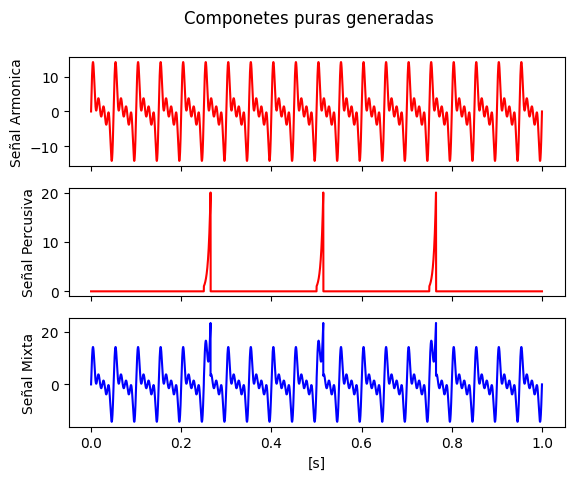

In [11]:
fs = 44100
D = 1 #Duracion en segundos
x_h = harmonic(4, 20,fs,5) #Por defecto la duracion es de 1s
x_p = impulses(3,fs,20, 15) # Tres impulsos de 30ms
x = x_p + x_h
t = np.linspace(0,D,fs*D)

#Graficamos cada señal
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.plot(t, x_h, c='red')
ax2.plot(t, x_p, c='red')
ax3.plot(t, x, c = 'blue')
 
ax1.set_ylabel('Señal Armonica')
ax2.set_ylabel('Señal Percusiva')
ax3.set_ylabel('Señal Mixta')
ax3.set_xlabel('[s]')

fig.suptitle('Componetes puras generadas')
plt.show()


Aplicamos la separacion a la señal mixta, y graficamos los resultados.
Para evaluar la efectividad medimos la similitud de las señales de entrada y salida utilizando la funcion tal como fue expresada en el informe. Cuanto menor sea este coeficiente mayor es la similitud entre las señales. En este caso estamos usando los siguiente parametros: 

$M = 2048$

$$

TypeError: 'module' object is not callable

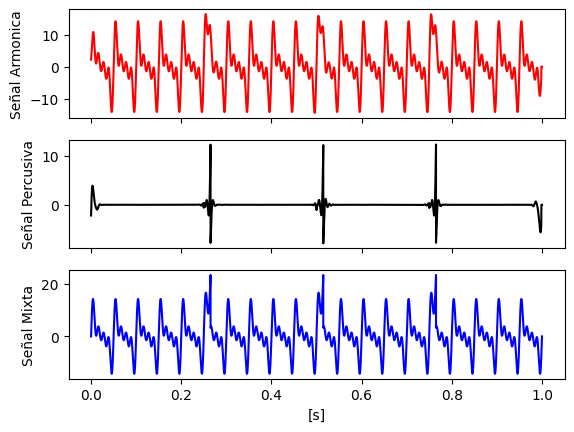

In [13]:

N = 2**11
M = 17

y_p ,y_h = hps(x,N,M)

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.plot(t, y_h, c='red')
ax2.plot(t, y_p, c='black')
ax3.plot(t, x, c='blue')
 
ax1.set_ylabel('Señal Armonica')
ax2.set_ylabel('Señal Percusiva')
ax3.set_ylabel('Señal Mixta')
ax3.set_xlabel('[s]')

s_p, s_h, h_max = hps_similarity_test(x_p,x_h,0,N,M,fs)

print('Similitud de señal pecusiva: ',s_p)
print('Similitud de señal armonica: ',s_h)
print('Similitud maximos de la señal armonica ',h_max )

Evaluamos la similitud en funcion de las muestras para difrentes valores de N.

In [ ]:
n = np.arange(3,12,1)
N_v = 2**n
similitudes_p = np.zeros(len(N_v))
similitudes_h = np.zeros(len(N_v))
h_max = np.zeros(len(N_v))
for i in range(len(N_v)):
    similitudes_p[i], similitudes_h[i], h_max[i] = hps_similarity_test(x_p,x_h,0,N_v[i],M,fs)

fig, ax = plt.subplots()

plt.plot(N_v, similitudes_h)
plt.plot(N_v, h_max)
ax.set_ylabel('Coeficiente de Similitud')
ax.set_xlabel('Largo de la ventana STFT')
plt.show()


NameError: name 'hps_similarity_test' is not defined

Con este criterio pareceria que para menores valores de N el algoritmo obtiene mejores resultados, pero esto sucede porque como la funcion de similitud mide el error promedio en toda la señal.

Aqui se pueden ver los resultados del algoritmo de referencia, con los mismos parametros que se utilizaron para los grafificos anteriores.  

(1, 44100)
Similitud de señal pecusiva:  [ 3.84918133  3.90517576  3.9613089  ... -2.39350372 -2.37446172
 -2.35546797]
Similitud de señal armonica:  [-3.84918133 -3.78347965 -3.71792613 ...  2.15012096  2.25276561
  2.35546797]
Similitud maximos de la señal armonica  0.23561064858126188


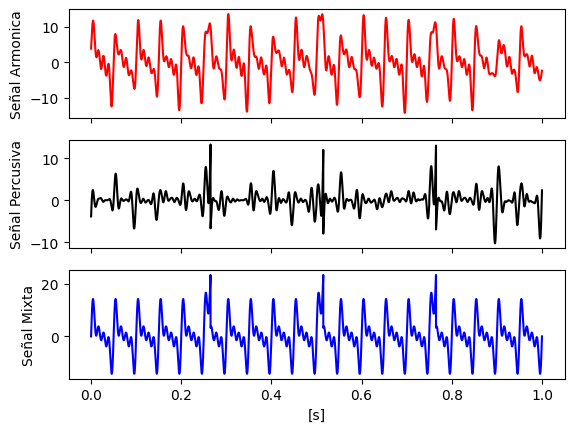

In [ ]:
if 1 == len(np.shape(x)):
    x = x[np.newaxis, :]
    print(x.shape)

ref_perc, ref_harm = _hpss(x, M, M, win_size = N, hop_size= int(N//4))
x = x_p + x_h

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.plot(t, ref_perc, c= 'red')
ax2.plot(t, ref_harm, c= 'black')
ax3.plot(t, x, c='blue')
 
ax1.set_ylabel('Señal Armonica')
ax2.set_ylabel('Señal Percusiva')
ax3.set_ylabel('Señal Mixta')
ax3.set_xlabel('[s]')

s_p, s_h, h_max = hps_similarity_test(ref_perc,ref_harm,0,N,M,fs)

print('Similitud de señal pecusiva: ',ref_perc)
print('Similitud de señal armonica: ',ref_harm)
print('Similitud maximos de la señal armonica ', h_max)

# Pruebas subjetivas de HPS y TSM en conjunto con audio.

Ahora procedemos a probar el algoritmo con señales musicales para diferentes valores de N.





Dado que 

In [ ]:
fs = 22050
alpha = 1.2
cfg1 = {"N": 8192, "Hs": 8192//4, "alpha": alpha, "fs": 22050}
cfg2 = {"N": 8192, "Hs": 8192//2, "alpha": alpha, "fs": 22050}
cfg3 = {"N": 4096, "Hs": 4096//2, "alpha": alpha, "fs": 22050}
cfg4 = {"N": 4096, "Hs": 4096//4, "alpha": alpha, "fs": 22050}
cfg5 = {"N": 4096, "Hs": 4096//8, "alpha": alpha, "fs": 22050}
cfg6 = {"N": 2048, "Hs": 2048//4, "alpha": alpha, "fs": 22050}
cfg7 = {"N": 1024, "Hs": 1024//4, "alpha": alpha, "fs": 22050}
cfg8 = {"N": 512, "Hs": 512//4, "alpha": alpha, "fs": 22050}
cfg_ola = {"N": 1024, "Hs": 1024//2, "alpha": alpha}

In [ ]:
path_audio = "/Users/matiasvereert/TSM/TSM_Toolkit/audios/sharp_bells.wav"
#En el config del HPS tenes que poner una lista con las configs de PV, OLA y HPS
cfg_hps_solo = {"N":1024, "M": 17}



cfg_hps = [cfg_ola, cfg3, cfg_hps_solo]
test = [["PV", cfg3, "PV TSM"], ["HPS", cfg_hps, "HPS TSM"], ["OLA", cfg_ola, "OLA TSM"]]

